In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [35]:
path=r"C:\Users\Storbiiic\Desktop\INTERNSHIP\CLEAN_SAMPLE\9_features_BACUDA.csv"
df=pd.read_csv(path, low_memory=False, sep=',')

In [36]:
df.shape

(7616106, 16)

In [37]:
df.columns

Index(['IDENTIFIANT_DUM', 'ID_OPERATEUR', 'ID_TRANSITAIRE',
       'BUREAU_SOUSCRIPTION', 'POIDSBRUTTOTAL', 'POIDSNETTOTAL', 'QUANTITEV0',
       'NGPV0', 'POIDV0', 'VALEURV0', 'ADUM_NUM_QUANTNORMV0', 'PAYSORIGINE',
       'DAY', 'MONTH', 'YEAR', 'FRAUD'],
      dtype='object')

In [40]:
df.nunique(axis=0)

IDENTIFIANT_DUM         1846429
ID_OPERATEUR              73253
ID_TRANSITAIRE            30222
BUREAU_SOUSCRIPTION          34
POIDSBRUTTOTAL           288276
POIDSNETTOTAL            411535
QUANTITEV0               338698
NGPV0                     13105
POIDV0                   546231
VALEURV0                 714333
ADUM_NUM_QUANTNORMV0     463510
PAYSORIGINE                 222
DAY                          31
MONTH                        12
YEAR                          4
FRAUD                         2
dtype: int64

In [42]:
df.duplicated().sum()

495329

In [43]:
df.describe()

,IDENTIFIANT_DUM,ID_OPERATEUR,ID_TRANSITAIRE,BUREAU_SOUSCRIPTION,POIDSBRUTTOTAL,POIDSNETTOTAL,QUANTITEV0,NGPV0,POIDV0,VALEURV0,ADUM_NUM_QUANTNORMV0,DAY,MONTH,YEAR,FRAUD
count,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06,7.616106e+06
mean,2.386115e+07,1.073976e+05,6.932092e+04,3.399268e+02,3.276170e+04,3.118101e+04,4.052762e+04,6.612106e+09,2.404175e+04,1.975422e+05,2.761072e+04,1.579509e+01,6.497001e+00,2.018743e+03,9.955219e-04
std,2.283120e+06,1.336282e+05,1.131923e+05,7.433487e+01,7.248309e+05,6.437586e+05,2.500426e+06,2.182487e+09,6.314597e+05,4.746357e+06,2.431325e+06,8.689609e+00,3.521995e+00,1.004208e+00,3.153618e-02
min,2.025410e+07,1.000000e+03,1.000000e+03,1.000000e+02,1.000000e-02,1.000000e-03,1.000000e-03,1.012100e+08,1.000000e-03,1.000000e-03,0.000000e+00,1.000000e+00,1.000000e+00,2.017000e+03,0.000000e+00
25%,2.181279e+07,1.043400e+04,1.255000e+03,3.000000e+02,5.040000e+02,4.270920e+02,4.000000e+00,4.908900e+09,3.000000e+00,9.500000e+02,3.000000e+00,8.000000e+00,3.000000e+00,2.018000e+03,0.000000e+00
50%,2.374879e+07,3.388600e+04,1.136000e+04,3.090000e+02,2.347590e+03,1.995580e+03,4.000000e+01,6.802930e+09,3.000000e+01,5.851000e+03,2.789000e+01,1.600000e+01,7.000000e+00,2.019000e+03,0.000000e+00
75%,2.606737e+07,1.958220e+05,7.026500e+04,4.110000e+02,9.077000e+03,7.604090e+03,9.480000e+02,8.504410e+09,4.326000e+02,4.376500e+04,4.822500e+02,2.300000e+01,1.000000e+01,2.020000e+03,0.000000e+00
max,2.777334e+07,7.258490e+05,7.258490e+05,7.000000e+02,5.161171e+08,8.344050e+07,6.217100e+09,1.000000e+10,8.344050e+07,9.290355e+09,4.823910e+09,3.100000e+01,1.200000e+01,2.020000e+03,1.000000e+00


In [44]:
df.isna().sum()

IDENTIFIANT_DUM          0
ID_OPERATEUR             0
ID_TRANSITAIRE           0
BUREAU_SOUSCRIPTION      0
POIDSBRUTTOTAL           0
POIDSNETTOTAL            0
QUANTITEV0               0
NGPV0                    0
POIDV0                   0
VALEURV0                 0
ADUM_NUM_QUANTNORMV0     0
PAYSORIGINE             51
DAY                      0
MONTH                    0
YEAR                     0
FRAUD                    0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['PAYSORIGINE'] = label_encoder.fit_transform(df['PAYSORIGINE'])


In [51]:
df.dtypes

IDENTIFIANT_DUM           int64
ID_OPERATEUR              int64
ID_TRANSITAIRE            int64
BUREAU_SOUSCRIPTION       int64
POIDSBRUTTOTAL          float64
POIDSNETTOTAL           float64
QUANTITEV0              float64
NGPV0                     int64
POIDV0                  float64
VALEURV0                float64
ADUM_NUM_QUANTNORMV0    float64
PAYSORIGINE               int32
DAY                       int64
MONTH                     int64
YEAR                      int64
FRAUD                   float64
dtype: object

# STANDARISATION AND PCA

## First case on the 9 features 

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [53]:
#Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [54]:
# Calculate covariance matrix
cov_matrix = np.cov(data_scaled, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

n_components = 2  

# Project data onto reduced dimensions
pca = PCA(n_components=n_components)
compressed_data = pca.fit_transform(data_scaled)


In [58]:
compressed_data

array([[ 0.14287288,  1.3028045 ],
       [ 0.24288954,  0.6949983 ],
       [ 0.41603699,  1.41500948],
       ...,
       [ 0.0844636 , -1.50859652],
       [-0.10404424, -1.76690716],
       [ 0.06535712, -1.50885549]])

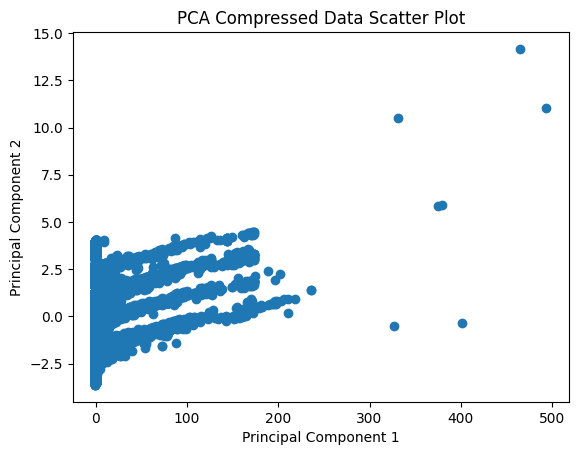

In [56]:
# Scatter plot of the compressed data
plt.scatter(compressed_data[:, 0], compressed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Compressed Data Scatter Plot')
plt.show()


### AUTOENCODER WITH PCA ON 9 FEATURES

In [62]:
from keras.layers import Input, Dense
from keras.models import Model

# Build the autoencoder
input_dim = 2  # Number of features in compressed_data
encoding_dim = 1  # Choose an encoding dimension
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(compressed_data, compressed_data, epochs=15, batch_size=512, shuffle=True)

# Use the trained autoencoder for anomaly detection
reconstructed_data = autoencoder.predict(compressed_data)
reconstruction_loss = np.mean(np.square(compressed_data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1  # Adjust this based on your data and requirements

# Identify anomalies
anomalies = compressed_data[reconstruction_loss > threshold]

print("Anomalies detected:", anomalies)


Epoch 1/15
14876/14876 [==============================] - 39s 3ms/step - loss: 2.3206
Epoch 2/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1936
Epoch 3/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1922
Epoch 4/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1922
Epoch 5/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1922
Epoch 6/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1922
Epoch 7/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1922
Epoch 8/15
14876/14876 [==============================] - 41s 3ms/step - loss: 2.1922
Epoch 9/15
14876/14876 [==============================] - 41s 3ms/step - loss: 2.1922
Epoch 10/15
14876/14876 [==============================] - 41s 3ms/step - loss: 2.1922
Epoch 11/15
14876/14876 [==============================] - 40s 3ms/step - loss: 2.1922
Epoch 12/15
14876/14876 [===========================

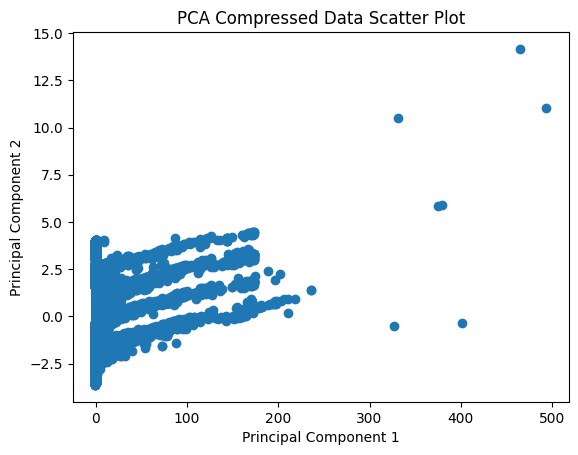

In [63]:
# Scatter plot of the compressed data
plt.scatter(anomalies[:, 0], anomalies[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Compressed Data Scatter Plot')
plt.show()

NameError: name 'anomalies_data' is not defined

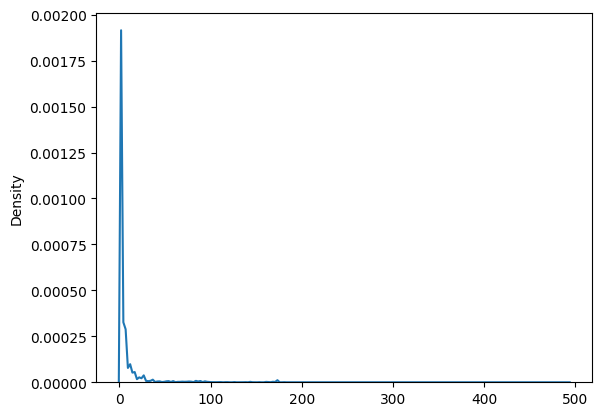

In [76]:
import seaborn as sns

sns.kdeplot(compressed_data[:, 0], label='Compressed Data')
sns.kdeplot(anomalies_data[:, 0], color='red', label='Anomalies')
plt.xlabel('Principal Component 1')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Principal Component 1')
plt.legend()
plt.show()


In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'compressed_data' is your 2-dimensional compressed data
# Convert 'compressed_data' to a NumPy array if it's not already
compressed_data = np.array(compressed_data)

# Define the dimensions for your autoencoder
input_dim = 2
encoding_dim = 1  # Desired reduced dimension

# Create the autoencoder model
autoencoder = keras.Sequential()

# Encoder layers
autoencoder.add(layers.Input(shape=(input_dim,)))
autoencoder.add(layers.Dense(2, activation='relu'))  # Adding more neurons than encoding_dim can help capture complex patterns
autoencoder.add(layers.Dense(encoding_dim, activation='relu'))

# Decoder layers
autoencoder.add(layers.Dense(2, activation='relu'))
autoencoder.add(layers.Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')  # Mean squared error loss for reconstruction

# Train the autoencoder
history=autoencoder.fit(compressed_data, compressed_data, epochs=15, batch_size=512, shuffle=True)


Epoch 1/15
14876/14876 [==============================] - 46s 3ms/step - loss: 2.2234
Epoch 2/15
14876/14876 [==============================] - 48s 3ms/step - loss: 2.1545
Epoch 3/15
14876/14876 [==============================] - 49s 3ms/step - loss: 2.1477
Epoch 4/15
14876/14876 [==============================] - 47s 3ms/step - loss: 2.1477
Epoch 5/15
14876/14876 [==============================] - 44s 3ms/step - loss: 2.1477
Epoch 6/15
14876/14876 [==============================] - 46s 3ms/step - loss: 2.1477
Epoch 7/15
14876/14876 [==============================] - 46s 3ms/step - loss: 2.1476
Epoch 8/15
14876/14876 [==============================] - 48s 3ms/step - loss: 2.1476
Epoch 9/15
14876/14876 [==============================] - 51s 3ms/step - loss: 2.1477
Epoch 10/15
14876/14876 [==============================] - 50s 3ms/step - loss: 2.1477
Epoch 11/15
14876/14876 [==============================] - 47s 3ms/step - loss: 2.1477
Epoch 12/15
14876/14876 [===========================

KeyError: 'val_loss'

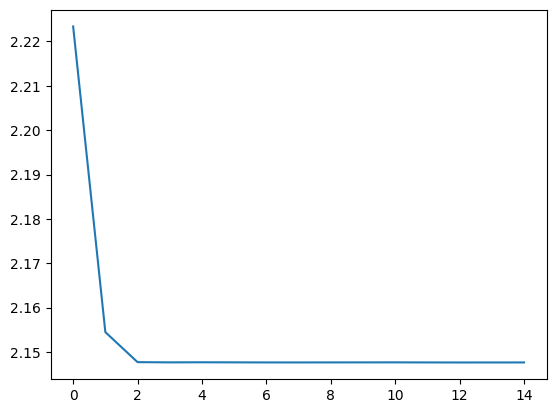

In [74]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()